In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [43]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [44]:
df.shape

(918, 12)

In [45]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [46]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

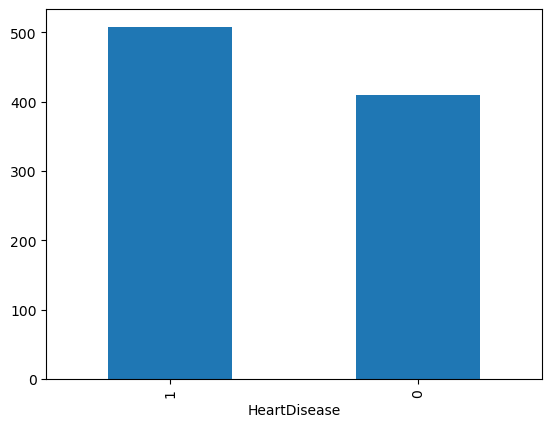

In [47]:
df['HeartDisease'].value_counts().plot(kind='bar')

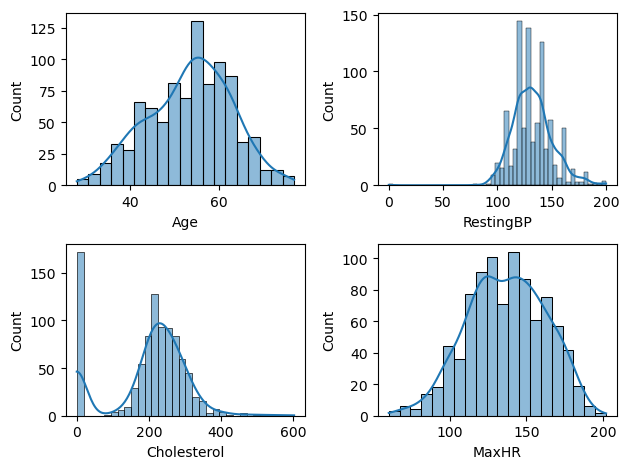

In [48]:
def plotting(var,num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde= True,)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3) 
plotting('MaxHR',4)

plt.tight_layout()

In [49]:
CholeMean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [50]:
CholeMean

np.float64(244.6353887399464)

In [51]:
df['Cholesterol']=df['Cholesterol'].replace(0,CholeMean)
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [52]:
RestingBp_mean = df.loc[df['RestingBP']!=0,'RestingBP'].mean() 
RestingBp_mean

np.float64(132.54089422028352)

In [53]:
df['RestingBP']=df['RestingBP'].replace(0,RestingBp_mean)

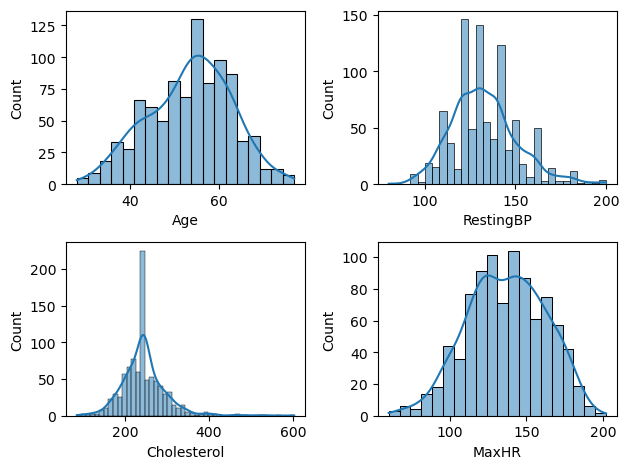

In [54]:
def plotting(var,num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde= True,)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3) 
plotting('MaxHR',4)

plt.tight_layout()

In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [56]:
df_encode = pd.get_dummies(df,drop_first=True,dtype=int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
col = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

df_encode[col] = scaler.fit_transform(df_encode[col])
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832529,0,1.382928,-0.832432,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527192,-1.212922,0,0.754157,0.105664,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141317,0.719935,0,-1.525138,-0.832432,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303619,-0.574892,0,-1.132156,0.574711,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971022,-0.931438,0,-0.581981,-0.832432,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253656,0.363389,0,-0.188999,0.293283,1,1,0,0,1,1,0,0,1,0
914,1.536902,0.637320,-0.968969,1,0.164684,2.357094,1,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141317,-2.132437,0,-0.857069,0.293283,1,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141317,-0.162048,0,1.461525,-0.832432,1,0,1,0,0,0,0,0,1,0


In [58]:
from scipy.stats import pearsonr

selected_feature = [
    "Age",
    "RestingBP",
    "Cholesterol",
    "FastingBS",
    "MaxHR",
    "Oldpeak"
]

correlations = {
    feature:pearsonr(df_encode[feature],df_encode['HeartDisease'])[0]
    for feature in selected_feature
}

correlations= pd.DataFrame(list(correlations.items()), columns=['Feature','Pearsonr_Correlation']).sort_values(by='Pearsonr_Correlation', ascending=False)
correlations

,Feature,Pearsonr_Correlation
5,Oldpeak,0.403951
0,Age,0.282039
3,FastingBS,0.267291
1,RestingBP,0.117938
2,Cholesterol,0.094071
4,MaxHR,-0.400421


In [59]:
from scipy.stats import chi2_contingency
char_columns=[
    "Sex_M",
    "ChestPainType_ATA",
    "ChestPainType_NAP",
    "ChestPainType_TA",
    "RestingECG_Normal",
    "RestingECG_ST",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]



alpha = 0.05
chi_results={}
for col in char_columns: 
    contigency = pd.crosstab(df_encode[col],df_encode['HeartDisease'])
    chi2_stat,p_val,_,_ = chi2_contingency(contigency)
    decision = 'Reject Null(keep Feature)' if p_val<alpha else 'Accept Null(drop feature)'
    chi_results[col]={
        'chi_stat': chi2_stat,
        'p_value': p_val,
        'decision':decision
    }
chi_results_df = pd.DataFrame(chi_results).T
chi_results_df = chi_results_df.sort_values(by='p_value')
chi_results_df

,chi_stat,p_value,decision
ST_Slope_Up,352.823905,0.0,Reject Null(keep Feature)
ST_Slope_Flat,279.659914,0.0,Reject Null(keep Feature)
ExerciseAngina_Y,222.259383,0.0,Reject Null(keep Feature)
ChestPainType_ATA,146.236323,0.0,Reject Null(keep Feature)
Sex_M,84.145101,0.0,Reject Null(keep Feature)
ChestPainType_NAP,40.608711,0.0,Reject Null(keep Feature)
RestingECG_ST,9.135266,0.002507,Reject Null(keep Feature)
RestingECG_Normal,7.327532,0.006791,Reject Null(keep Feature)
ChestPainType_TA,2.273802,0.131577,Accept Null(drop feature)


In [60]:
final_df = df_encode.drop('ChestPainType_TA',axis=1)
final_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832529,0,1.382928,-0.832432,0,1,1,0,1,0,0,0,1
1,-0.478484,1.527192,-1.212922,0,0.754157,0.105664,1,0,0,1,1,0,0,1,0
2,-1.751359,-0.141317,0.719935,0,-1.525138,-0.832432,0,1,1,0,0,1,0,0,1
3,-0.584556,0.303619,-0.574892,0,-1.132156,0.574711,1,0,0,0,1,0,1,1,0
4,0.051881,0.971022,-0.931438,0,-0.581981,-0.832432,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253656,0.363389,0,-0.188999,0.293283,1,1,0,0,1,0,0,1,0
914,1.536902,0.637320,-0.968969,1,0.164684,2.357094,1,1,0,0,1,0,0,1,0
915,0.370100,-0.141317,-2.132437,0,-0.857069,0.293283,1,1,0,0,1,0,1,1,0
916,0.370100,-0.141317,-0.162048,0,1.461525,-0.832432,1,0,1,0,0,0,0,1,0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X=final_df.drop('HeartDisease',axis=1)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414853,0.832529,0,1.382928,-0.832432,1,1,0,1,0,0,0,1
1,-0.478484,1.527192,-1.212922,0,0.754157,0.105664,0,0,1,1,0,0,1,0
2,-1.751359,-0.141317,0.719935,0,-1.525138,-0.832432,1,1,0,0,1,0,0,1
3,-0.584556,0.303619,-0.574892,0,-1.132156,0.574711,0,0,0,1,0,1,1,0
4,0.051881,0.971022,-0.931438,0,-0.581981,-0.832432,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253656,0.363389,0,-0.188999,0.293283,1,0,0,1,0,0,1,0
914,1.536902,0.637320,-0.968969,1,0.164684,2.357094,1,0,0,1,0,0,1,0
915,0.370100,-0.141317,-2.132437,0,-0.857069,0.293283,1,0,0,1,0,1,1,0
916,0.370100,-0.141317,-0.162048,0,1.461525,-0.832432,0,1,0,0,0,0,1,0


In [63]:
y = df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.5194496962670399

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [70]:
X = df_encode.drop('HeartDisease',axis=1)


In [71]:
y = df_encode['HeartDisease']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
scaler = StandardScaler()

In [74]:
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(X_test)

In [92]:
models={
    'logistic_regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Naive_Bayes': GaussianNB(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Svm': SVC() 
}

In [93]:
result = []

In [94]:
for name,model in models.items(): 
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    acc =accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy':round(acc,4),
        'f1 score':round(f1,4)
    })

In [95]:
result = pd.DataFrame(result)

In [96]:
result

,model,Accuracy,f1 score
0,logistic_regression,0.8641,0.8804
1,KNN,0.8533,0.8708
2,Naive_Bayes,0.8533,0.8683
3,Decision_Tree,0.7880,0.8152
4,Svm,0.8478,0.8679


In [98]:
import joblib 
joblib.dump(models['logistic_regression'],'logistic_regression_heart.pkl')
joblib.dump(scaler,'scaler.pkl') 
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']